<a href="https://colab.research.google.com/github/abhay0908/30-seconds-of-code/blob/master/Diabetes_Scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description:

Dr. Zeus has gathered some data from 1000 patients that have diabetes in a timespan of a year. The data has several columns depicting various information regarding how they are managing their condition.

- 'Kolku dolgo e dijabeticar' - a column depicting (in years) the length of the condition that the patient has had,


- 'Kolku mu e tromesechen (hemoglobin A1C) she4er' - a column depicting the last measured value of the hemoglobin A1C sugar levels every three months.,


- 'Dali e na insulin ili na tabli?' - information whether a patient is on insulin (value 1) or tablets (value 0),


- 'Glukoza (momentalna) vo krv' - information about current glucose level,


- 'Dali ima dijabetesna retinopatija?' - information whether the patient has (value 1) or does not have (value 0) diabetic retinopathy.

    ## What needs to be done?


- 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.


- 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything). ..........(3 points total)


- 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves. .......... (3 points)


- 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.   .......... (3 points)


- 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results? .......... (3 points)


- 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups. .......... (4 points)


- 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible. .......... (4 points)

---

### Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.

In [2]:
#Reading the dataset into pandas
df = pd.read_csv('Diabetes_data.csv')
df

,Unnamed: 0,Kolku dolgo e dijabeticar,Kolku mu e tromesechen (hemoglobin A1C) she4er,Dali e na insulin ili na tabli?,Glukoza (momentalna) vo krv,Dali ima dijabetesna retinopatija?
0,0,3.0,9.522692,0.0,1.747037,1.0
1,1,40.0,6.397994,0.0,6.416253,1.0
2,2,38.0,7.079202,0.0,7.006710,0.0
3,3,16.0,4.400294,1.0,5.614222,0.0
4,4,17.0,4.746816,1.0,4.919372,1.0
...,...,...,...,...,...,...
995,995,25.0,8.890070,0.0,5.404914,0.0
996,996,44.0,11.036004,1.0,7.315449,0.0
997,997,42.0,4.943409,0.0,6.568171,0.0
998,998,29.0,6.485128,0.0,4.110812,1.0


---

### 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything).

In [3]:
# Renaming columns
df.rename(columns=
          {'Unnamed: 0': 'ID',
          'Kolku dolgo e dijabeticar' : 'Time being diabetic',
          'Kolku mu e tromesechen (hemoglobin A1C) she4er' : 'Sugar level(hemoglobin A1C) in three month period',
          'Dali e na insulin ili na tabli?' : 'Do they use insulin or pills?',
          'Glukoza (momentalna) vo krv': 'Current blood glucose',
          'Dali ima dijabetesna retinopatija?': 'Do they have diabetic retinopathy?'}, inplace=True)
df

,ID,Time being diabetic,Sugar level(hemoglobin A1C) in three month period,Do they use insulin or pills?,Current blood glucose,Do they have diabetic retinopathy?
0,0,3.0,9.522692,0.0,1.747037,1.0
1,1,40.0,6.397994,0.0,6.416253,1.0
2,2,38.0,7.079202,0.0,7.006710,0.0
3,3,16.0,4.400294,1.0,5.614222,0.0
4,4,17.0,4.746816,1.0,4.919372,1.0
...,...,...,...,...,...,...
995,995,25.0,8.890070,0.0,5.404914,0.0
996,996,44.0,11.036004,1.0,7.315449,0.0
997,997,42.0,4.943409,0.0,6.568171,0.0
998,998,29.0,6.485128,0.0,4.110812,1.0


In [4]:
#Checking the number of rows with NAN values
df.isna().sum()

ID                                                    0
Time being diabetic                                  21
Sugar level(hemoglobin A1C) in three month period    27
Do they use insulin or pills?                        12
Current blood glucose                                14
Do they have diabetic retinopathy?                   30
dtype: int64

The columns are staying as they are in the data set because with deletition of rows with null values or nan the lost of data will be significant and also we have columns with only zero and one that are similar to yes/no questions
and getting the mean of that columns is illogical

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 1000 non-null   int64  
 1   Time being diabetic                                979 non-null    float64
 2   Sugar level(hemoglobin A1C) in three month period  973 non-null    float64
 3   Do they use insulin or pills?                      988 non-null    float64
 4   Current blood glucose                              986 non-null    float64
 5   Do they have diabetic retinopathy?                 970 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


---

### 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves.

In [6]:
#Solution for the patient with highest glucose level
highest_glucose_level = df['Current blood glucose'].max()
highest_glucose_patient = df['Current blood glucose'].idxmax()
print(f'The patient with the highest glucose level is the one with id {highest_glucose_patient}'
      f' and glucose level of {highest_glucose_level}.')

The patient with the highest glucose level is the one with id 664 and glucose level of 12.598831418508324.


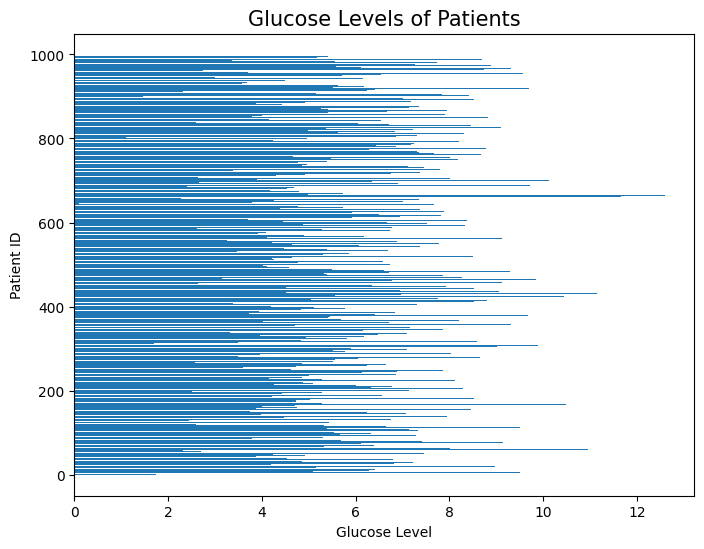

In [7]:
#Sketch that shows the glucose levels of the patients
plt.figure(figsize=(8, 6))
plt.ylabel('Patient ID')
plt.xlabel('Glucose Level')
plt.title('Glucose Levels of Patients').set_size(15)
plt.barh(df['ID'], df['Current blood glucose'])
plt.show()

The graph displays different heights of bars, indicating that patients have different glucose levels.
Some patients have higher glucose levels, while others have lower levels. There is no specific patter in the glucose levels.

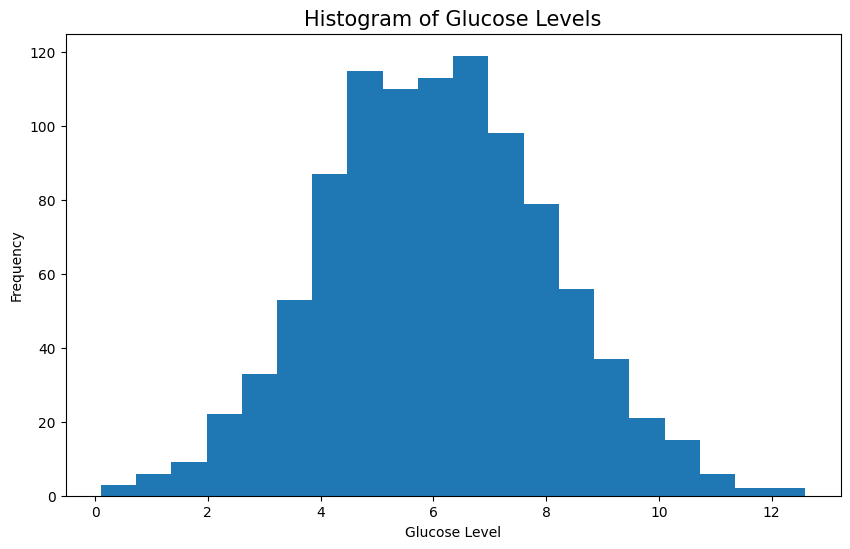

In [8]:
#Sketch that show the most frequent glucose level in the patient
plt.figure(figsize=(10, 6))
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Levels').set_size(15)
plt.hist(df['Current blood glucose'], bins=20)
plt.show()

With this histogram you can see that most patients have a glucose level between 5 and 7, which is somewhere in the limts of a normal glucose level for those who have diabetes( 5.0 to 7.2 mmol/L ).

### 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.

In [9]:
#Solution for finding the average number of hemoglobin A1C levels of patients per length of disease
average_hemoglobin_per_length = df.groupby('Time being diabetic')['Sugar level(hemoglobin A1C) in three month period'].mean()
print(average_hemoglobin_per_length)

Time being diabetic
1.0     7.008733
2.0     7.030744
3.0     6.469350
4.0     6.313919
5.0     5.496091
6.0     6.685249
7.0     6.619092
8.0     6.415699
9.0     6.507737
10.0    6.737657
11.0    6.146007
12.0    6.690991
13.0    6.491200
14.0    6.309424
15.0    6.532798
16.0    6.149398
17.0    6.486472
18.0    7.121592
19.0    6.672744
20.0    6.517139
21.0    5.643940
22.0    6.290828
23.0    6.797437
24.0    6.189554
25.0    6.900875
26.0    6.368538
27.0    6.479731
28.0    5.409775
29.0    6.198604
30.0    7.779622
31.0    6.871323
32.0    5.935454
33.0    6.882989
34.0    7.297670
35.0    6.845715
36.0    5.283679
37.0    7.129256
38.0    6.504638
39.0    6.893647
40.0    6.197326
41.0    6.816441
42.0    6.446772
43.0    6.310766
44.0    7.069679
Name: Sugar level(hemoglobin A1C) in three month period, dtype: float64


In [10]:
#Solution for finding the duration of the disease has the highest average glucose levels
duration_with_highest_average = average_hemoglobin_per_length.idxmax()
print(f'The duration of the disease with the highest average glucose levels is {duration_with_highest_average} years.')

The duration of the disease with the highest average glucose levels is 30.0 years.


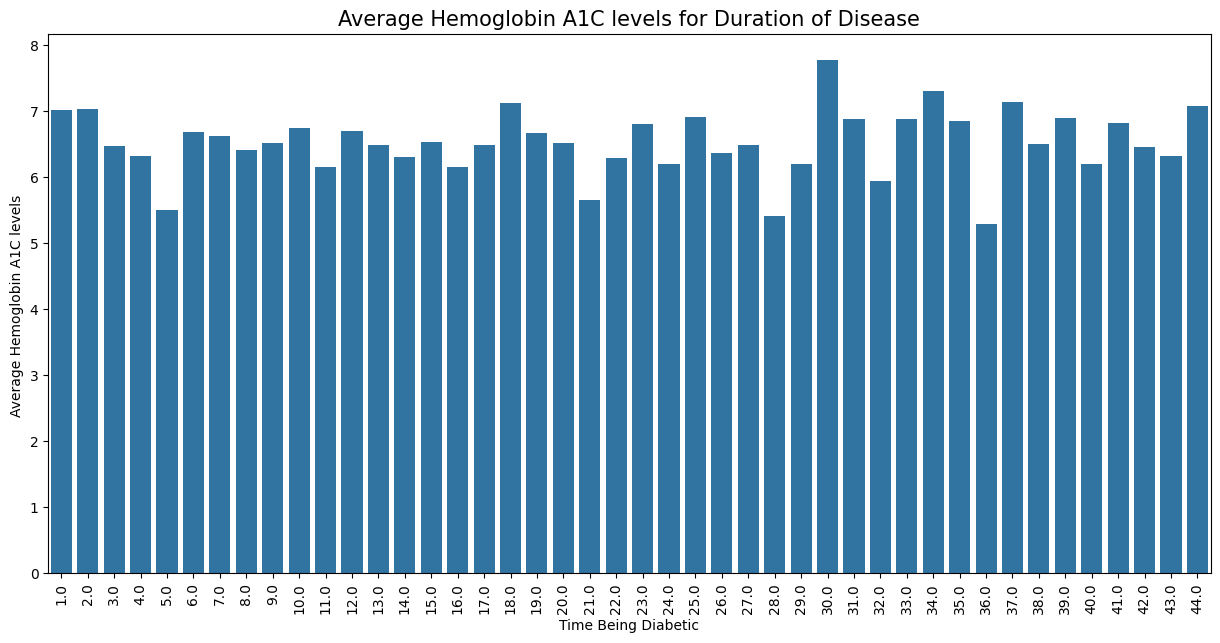

In [11]:
#Sketch that show the duration of the disease and the average hemoglobin A1C levels during the disease
plt.figure(figsize = (15, 7))
plt.xticks(rotation=90)
plt.xlabel('Time Being Diabetic')
plt.ylabel('Average Hemoglobin A1C levels ')
plt.title('Average Hemoglobin A1C levels for Duration of Disease').set_size(15)
sns.barplot(x=average_hemoglobin_per_length.index, y=average_hemoglobin_per_length.values)
plt.show()

As you can see from the data above the longest someone had the disease is 44 years. The average hemoglobin AC1 levels are around the number 7 and is not corelated with the duration of the disease.

<Axes: xlabel='Time being diabetic', ylabel='Sugar level(hemoglobin A1C) in three month period'>

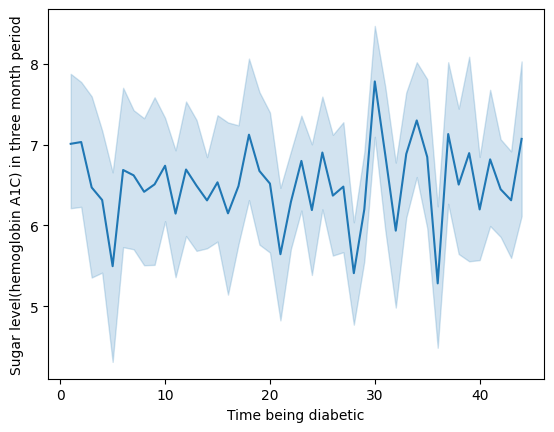

In [12]:
sns.lineplot(data = df, x='Time being diabetic', y ='Sugar level(hemoglobin A1C) in three month period')


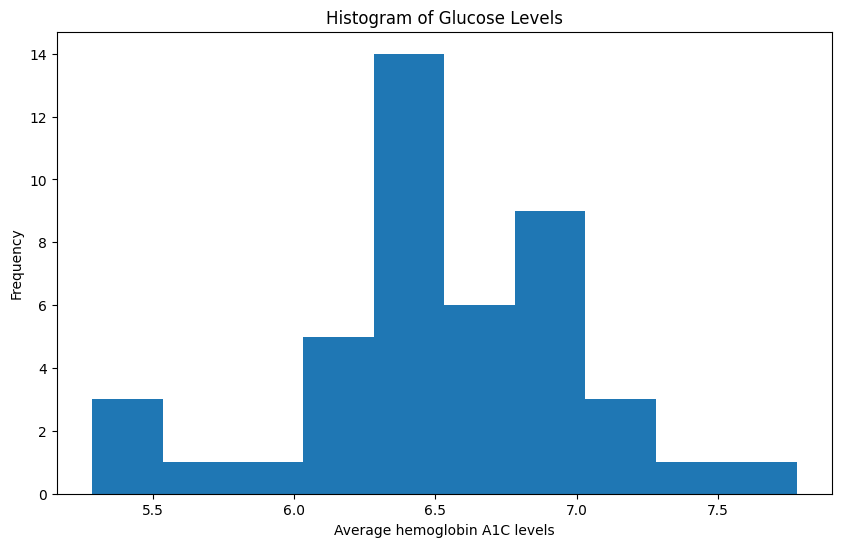

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(average_hemoglobin_per_length , bins=10)
plt.xlabel('Average hemoglobin A1C levels')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Levels')
plt.show()

---

### 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results?

In [14]:
#Solution for finding the average duration of the disease for patients that are on insulin and patients that are on pills
average_duration_insulin = df.loc[df['Do they use insulin or pills?'] == 1, 'Time being diabetic'].mean().round()
average_duration_pills = df.loc[df['Do they use insulin or pills?'] == 0, 'Time being diabetic'].mean().round()
print(f'The average duration of the disease, if the patients uses insulin, is {average_duration_insulin} years.\n'
        f'The average duration of the disease, if the patients uses pills, is {average_duration_pills} years.' )

The average duration of the disease, if the patients uses insulin, is 23.0 years.
The average duration of the disease, if the patients uses pills, is 22.0 years.


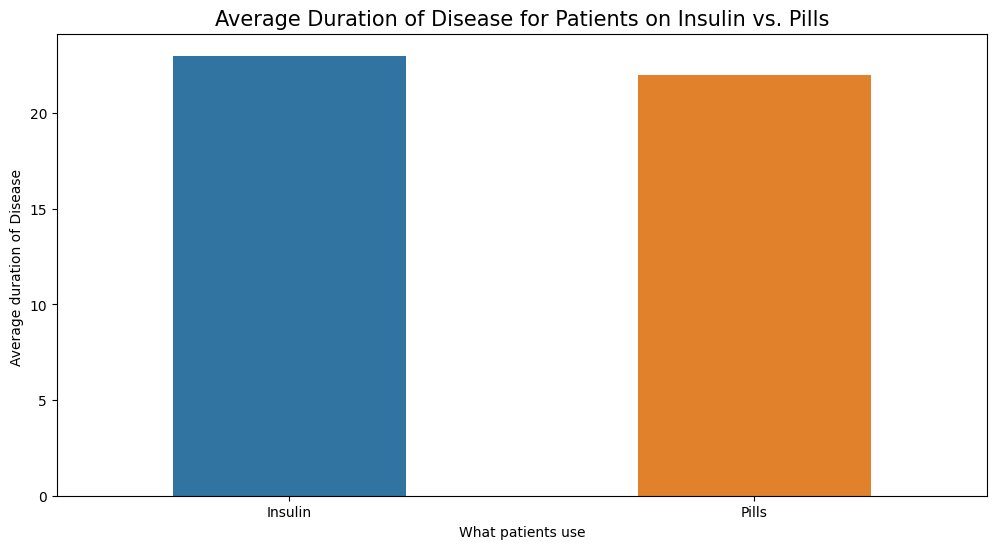

In [15]:
# Sektch that shows comparison on both methods
categories = ['Insulin', 'Pills']
average_durations = [average_duration_insulin, average_duration_pills]
plt.figure(figsize = (12, 6))
plt.xlabel('What patients use')
plt.ylabel('Average duration of Disease ')
plt.title('Average Duration of Disease for Patients on Insulin vs. Pills' ).set_size(15)
sns.barplot(x=categories, y=average_durations, hue = categories, width = 0.5)
plt.show()

As can be seen form the diagram above the patients that use insulin have had the disease longer compared to the ones using pills. It is safe to say that using pills for this disease does get a better results in the long run. So as a recomendation  the better option would be using pills.

In [16]:
# a = df[df['Do they use insulin or pills'] == 1].groupby('Do they use insulin or pills')['Time being diabetic'].mean()
# print(a.loc[1])
# b = df[df['Do they use insulin or pills'] == 0].groupby('Do they use insulin or pills')['Time being diabetic'].mean()
# print(b.loc[0])

---

### 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups.

In [17]:
#Solution for finding the number of patients with normal and elevated hemoglobin A1C levels
normal_A1C_level = df[df['Sugar level(hemoglobin A1C) in three month period'] < 5.7]
elevated_A1C_level = df[df['Sugar level(hemoglobin A1C) in three month period'] >= 5.7]
number_of_patients_normal = normal_A1C_level.shape[0]
number_of_patients_elevated = elevated_A1C_level.shape[0]
print(f'The total number of patients with normal A1C level is {number_of_patients_normal}. \n'
     f'The total number of patients with elevated A1C level is {number_of_patients_elevated}.')

The total number of patients with normal A1C level is 331. 
The total number of patients with elevated A1C level is 642.


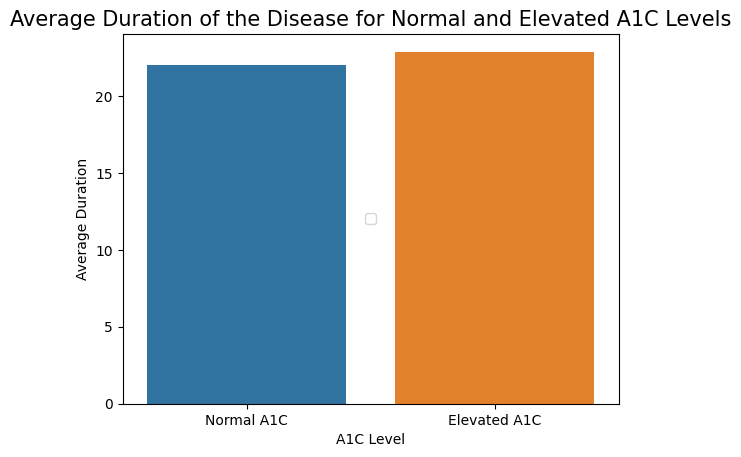

In [18]:
#Sketch for distignushing both groups depending on the length of disease
avg_duration_df = pd.DataFrame({'A1C Level': [ 'Normal A1C', 'Elevated A1C'],
                               'Average Duration': [normal_A1C_level['Time being diabetic'].mean(),
                                                    elevated_A1C_level['Time being diabetic'].mean()]})
plt.xlabel('A1C Level')
plt.ylabel('Average Duration')
plt.title('Average Duration of the Disease for Normal and Elevated A1C Levels').set_size(15)
sns.barplot(x='A1C Level', y='Average Duration', data=avg_duration_df, hue ='A1C Level')
plt.legend(loc ='center')
plt.show()

As can be seen from the graph above the patients with elevated A1C levels tend to have a longer average duration of the disease compared to patients with normal A1C levels. Meaning that there may be a correlation between higher A1C levels and longer duration of the disease

---

### 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible.

In [19]:
#Solution for finding the patients with and without retinopaty
with_retinopathy = df[df['Do they have diabetic retinopathy?' ] == 1]
without_retinopathy = df[df['Do they have diabetic retinopathy?' ] == 0]
number_of_patients_with = with_retinopathy.shape[0]
number_of_patients_without = without_retinopathy.shape[0]
print(f'The number of patients with retionpathy is {number_of_patients_with}.\n'
     f'The number of patients wihout retionpathy is {number_of_patients_without}.')

The number of patients with retionpathy is 471.
The number of patients wihout retionpathy is 499.


#### rethinopaty vs duration of diabetes

In [20]:
time_with_rethinopathy = with_retinopathy['Time being diabetic']
avg_with_rethinopathy = with_retinopathy['Time being diabetic'].mean()
time_without_rethinopathy = without_retinopathy['Time being diabetic']
avg_without_rethinopathy = without_retinopathy['Time being diabetic'].mean()

print(f'The average duration of the disease for patients with retinopathy is {avg_with_rethinopathy}.\n'
      f'The average duration of the disease for patients without retinopathy is {avg_without_rethinopathy}')

The average duration of the disease for patients with retinopathy is 22.589130434782607.
The average duration of the disease for patients without retinopathy is 22.768916155419223


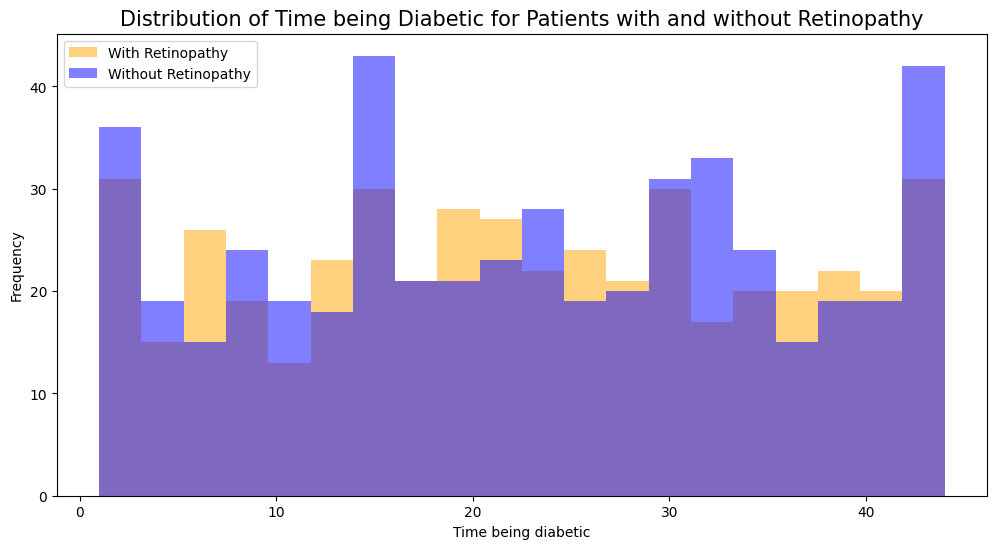

In [21]:
plt.figure(figsize = (12, 6))
plt.hist(time_with_rethinopathy , bins=20, color='orange', alpha=0.5, label='With Retinopathy')
plt.hist(time_without_rethinopathy , bins=20, color='blue', alpha=0.5, label='Without Retinopathy')
plt.xlabel('Time being diabetic')
plt.ylabel('Frequency')
plt.title('Distribution of Time being Diabetic for Patients with and without Retinopathy').set_size(15)
plt.legend()
plt.show()

From the presented data you can see that there is higher frequency of patient with retionpathy in the beginning of the disease compared to those without. As the duration od the disease increses the frequency of patients with and witouth retinopathy varies while the which means there is no clear correlation between the duration of disease and having retinopathy.

#### rethinopaty vs using insulin/pills

In [22]:
avg_duration_with_retinopathy_insulin = with_retinopathy[with_retinopathy['Do they use insulin or pills?'] == 1]['Time being diabetic'].mean()
avg_duration_without_retinopathy_insulin = without_retinopathy[without_retinopathy['Do they use insulin or pills?'] == 1]['Time being diabetic'].mean()

avg_duration_with_retinopathy_pills = with_retinopathy[with_retinopathy['Do they use insulin or pills?'] == 0]['Time being diabetic'].mean()
avg_duration_without_retinopathy_pills = without_retinopathy[without_retinopathy['Do they use insulin or pills?'] == 0]['Time being diabetic'].mean()

print(f'The average duration of the disease for patients with retinopathy using insulin is {avg_duration_with_retinopathy_insulin} and withouth is {avg_duration_without_retinopathy_insulin }.\n'
     f'The average duration of the disease for patients with retinopathy using pills is {avg_duration_with_retinopathy_pills} and withouth is {avg_duration_without_retinopathy_pills }.')

The average duration of the disease for patients with retinopathy using insulin is 22.448132780082986 and withouth is 23.540425531914895.
The average duration of the disease for patients with retinopathy using pills is 22.593457943925234 and withouth is 22.213709677419356.


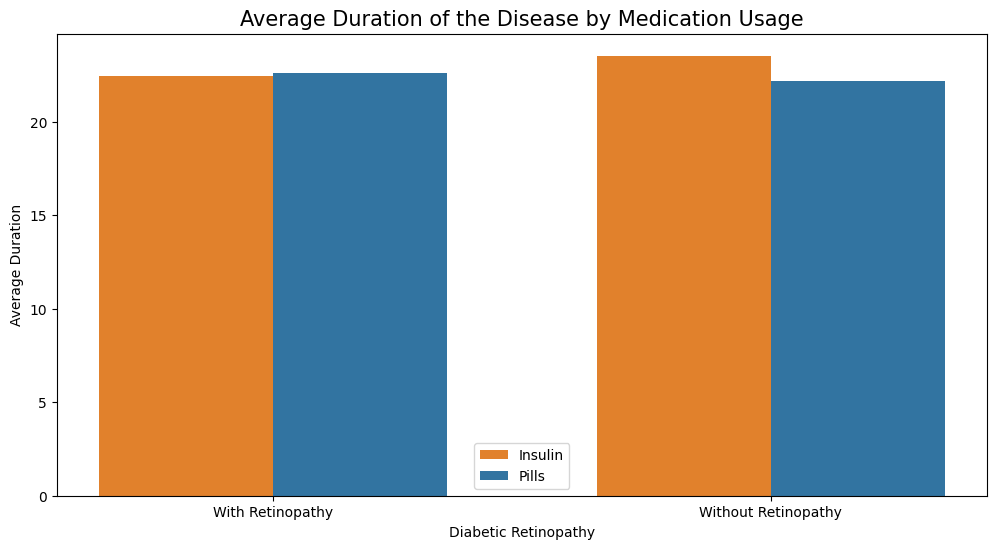

In [23]:
insulin_names = ['With Retinopathy', 'Without Retinopathy']
insulin_values = [avg_duration_with_retinopathy_insulin, avg_duration_without_retinopathy_insulin]

pills_names = ['With Retinopathy', 'Without Retinopathy']
pills_values = [avg_duration_with_retinopathy_pills, avg_duration_without_retinopathy_pills]
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(insulin_names))

ax.bar(index, insulin_values, bar_width, color='#e1812c', label='Insulin')
ax.bar(index + bar_width, pills_values, bar_width, color='#3274a1', label='Pills')

ax.set_xlabel('Diabetic Retinopathy')
ax.set_ylabel('Average Duration')
ax.set_title('Average Duration of the Disease by Medication Usage').set_size(15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(insulin_names)
ax.legend()

plt.show()

# fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.bar(insulin_names, insulin_values, color='orange')
# ax1.set_xlabel('Diabetic Retinopathy')
# ax1.set_ylabel('Average Duration')
# ax1.set_title('Average Duration of the Disease for Insulin Usage')

# ax2.bar(pills_names, pills_values, color='blue')
# ax2.set_xlabel('Diabetic Retinopathy')
# ax2.set_ylabel('Average Duration')
# ax2.set_title('Average Duration of the Disease for Pills Usage')

# plt.tight_layout()
# plt.show()

As can be seen from the result, among the patients who use insulin, those with rethiopathy have shorther average duration of the disease compared to those without.And among the patients who use pills, those without rethiopathy have shorther average duration of the disease compared to those with. This means using medication, specifically insulin, may be associated with a shorter duration of the disease in patients with retinopathy.

<ipython-input-24-592968e8eb05>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(data=df, x='Do they use insulin or pills?', hue='Do they have diabetic retinopathy?').set_xticklabels(['Pills', 'Insulin'])


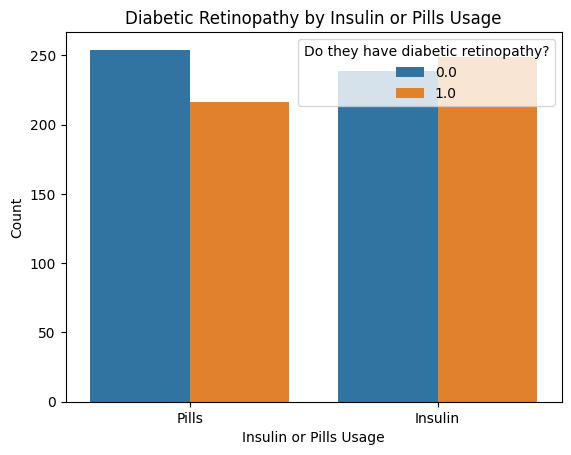

In [24]:
sns.countplot(data=df, x='Do they use insulin or pills?', hue='Do they have diabetic retinopathy?').set_xticklabels(['Pills', 'Insulin'])
plt.xlabel('Insulin or Pills Usage')
plt.ylabel('Count')
plt.title('Diabetic Retinopathy by Insulin or Pills Usage')
plt.show()

From the graph, you can see that among patients using pills, there are more individuals without retinopathy and among patients using insulin, there are more individuals with rethinopathy. This suggests that retinopathy may be more frequent among patients using insulin compared to those using pills.

#### rethinopaty vs glucose levels

In [25]:
avg_glucose_with_retinopathy = with_retinopathy[ 'Current blood glucose' ].mean()
avg_glucose_without_retinopathy = without_retinopathy['Current blood glucose'].mean()

print(f'The average glucose levels of patients with retinopathy is {avg_glucose_with_retinopathy}.\n'
     f'The average glucose levels of patients without retinopathy is {avg_glucose_without_retinopathy}.')

The average glucose levels of patients with retinopathy is 5.97827182822184.
The average glucose levels of patients without retinopathy is 6.142321397929804.


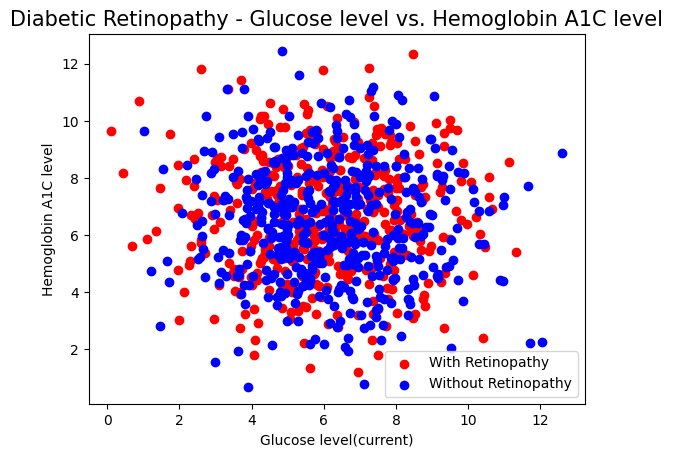

In [26]:
plt.scatter(with_retinopathy['Current blood glucose'], with_retinopathy['Sugar level(hemoglobin A1C) in three month period'], color='red', label='With Retinopathy')
plt.scatter(without_retinopathy['Current blood glucose'], without_retinopathy['Sugar level(hemoglobin A1C) in three month period'], color='blue', label='Without Retinopathy')
plt.xlabel('Glucose level(current)')
plt.ylabel('Hemoglobin A1C level')
plt.title('Diabetic Retinopathy - Glucose level vs. Hemoglobin A1C level').set_size(15)
plt.legend()
plt.show()

Seeing the data points above you can conclude that for patients with and without retinopaty are centered in the middle indicating there being a relationship between the glucose level, hemoglobin A1C level and the presence of diabetic retionpathy. In this case it would be best to conduct more detailed analysis determining the relationship between this two variables.

#### correlation between the values in all columns

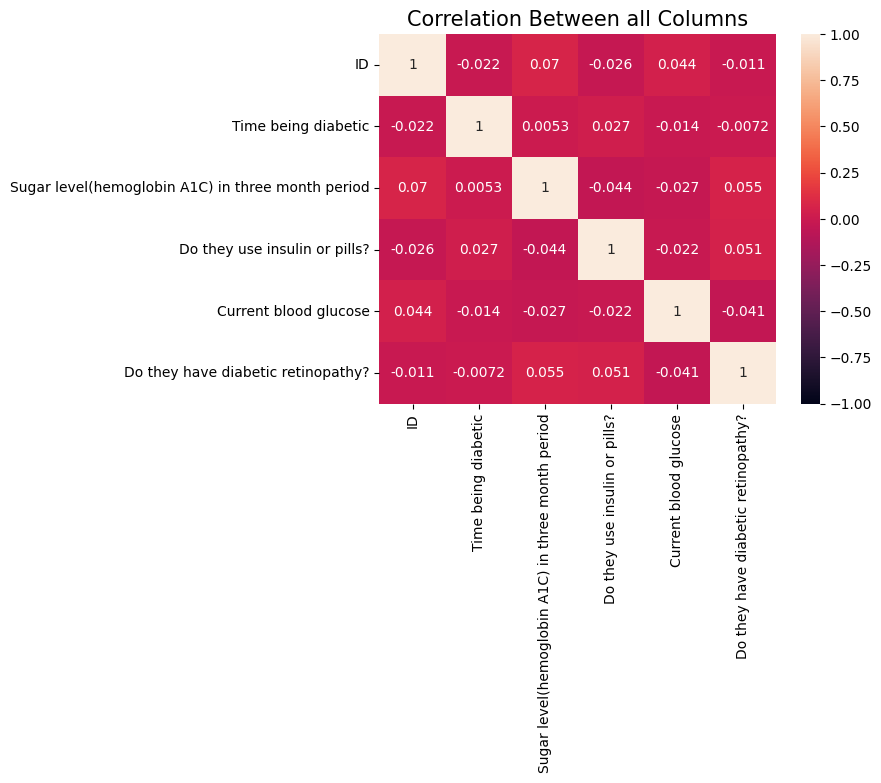

In [28]:
correlation = df.corr()
sns.heatmap( correlation, annot=True,  vmin=-1, vmax=1)
plt.title('Correlation Between all Columns').set_size(15)
plt.show()

This heat map shows the correlation between diffrent columns in the dataset.Each cell has a color and a number indicating the strength of the correlation.Darker colors show lower or negative correlations values and variables move in opposite direction(one will increase, other one decrease), and lighter colors show higher or positive correlations values and varibales move in the same direction(both increse or both decrease).